In [ ]:
#importing all the libraries

from pandas.io.parsers.readers import read_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#normalizing all the features

df = np.genfromtxt('pima-indians-diabetes.csv', delimiter = ',')

dfn = (np.delete(df, 0, 0)).T

for i in range(9):

  max = np.max(dfn[i])
  min = np.min(dfn[i])

  dfn[i] = (dfn[i] - min) / (max - min)

dfn = dfn.T

x = dfn[:,:8]
y = dfn[:,8]

w = np.random.randint(len(x))
print(x[w])


[0.         0.61809045 0.72131148 0.37373737 0.         0.52459016
 0.05081127 0.13333333]


Linear Regression: Sum(-(η*(y^ - yt)*xt))
Logistic Regression: Sum(-(η*(y^ - sigmoid(yt))*xt))

In [ ]:
#SGD on Linear Regression

x = dfn[500::,:8]
y = dfn[500::,8]
xtest = dfn[:500,:8:]
ytest = dfn[:500:,8]

print(x.shape)


weights = np.zeros(dfn.shape[1]-1)

def SGD_Linear(x, y, w, alpha, xtest, ytest, threshold = 1e-06) :

  wt = w
  Tsum = 1
  loss = []
  step = []
  sse = []
  #loss.append(0)
  #step.append(0)



  #print(wt)

  for i in range(100000):

    w_old = wt

    ind = np.random.randint(len(x))
    xt = x[ind]
    yt = y[ind]

    Tsum = Tsum + (np.dot(wt, xt)-yt)**2

    if i % 100 == 0 and i != 0: 
      
      z = Tsum / i
      loss.append(z)
      step.append(i)

      prediction = np.dot(xtest, wt)
      prediction = prediction >= .5
      prediction = prediction.astype(int)
      v = sse.append(np.sum((prediction - ytest)**2))
    

    wt = wt - alpha*(np.dot(wt, xt)-yt)*xt


    #if np.abs(wt-w_old).max() < threshold:
      #break

  l2 = np.linalg.norm(wt)

  return wt, loss, step, l2, sse


'''www, loss1, step1 = SGD_Linear(x,y,weights,.8,threshold=1e-06)

print(www)

print(step1)

plt.figure()
plt.plot(step1, loss1)
plt.show()'''






(268, 8)


'www, loss1, step1 = SGD_Linear(x,y,weights,.8,threshold=1e-06)\n\nprint(www)\n\nprint(step1)\n\nplt.figure()\nplt.plot(step1, loss1)\nplt.show()'

In [ ]:
#SGD on Logistic Regression

def SGD_Logistic(x, y, w, alpha, xtest, ytest, threshold = 1e-06) :

  wt = w
  Tsum = 1
  loss = []
  step = []
  sse = []

  def sigmoid(q):

    r = 1 / (1 + np.exp(-q))

    return r

  for i in range(1000000):

    ind = np.random.randint(len(x))
    xt = x[ind]
    yt = y[ind]

    Tsum = Tsum + (np.dot(wt, xt)-yt)**2

    if i % 100 == 0 and i != 0: 
      
      z = Tsum / i
      loss.append(z)
      step.append(i)

      prediction = np.dot(xtest, wt)
      prediction = prediction >= .5
      prediction = prediction.astype(int)
      v = sse.append(np.sum((prediction - ytest)**2))
      

    wt = wt - alpha*(sigmoid(np.dot(wt, xt))-yt)*xt

    #if np.abs(wt) < threshold:
      #break

  l2 = np.linalg.norm(wt)

  return wt, loss, step, l2, sse

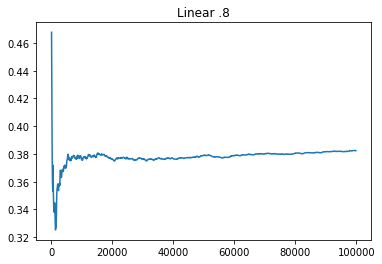

The l2 norm is: 2.631423752143083
SSE array:  [193.0, 184.0, 173.0, 298.0, 183.0, 182.0, 170.0, 233.0, 214.0, 180.0, 149.0, 298.0, 180.0, 309.0, 190.0, 154.0, 182.0, 263.0, 169.0, 251.0, 176.0, 149.0, 180.0, 246.0, 170.0, 198.0, 153.0, 181.0, 171.0, 178.0, 202.0, 171.0, 170.0, 273.0, 180.0, 167.0, 157.0, 167.0, 177.0, 179.0, 158.0, 172.0, 180.0, 180.0, 309.0, 151.0, 287.0, 155.0, 172.0, 173.0, 184.0, 256.0, 177.0, 172.0, 176.0, 275.0, 161.0, 151.0, 181.0, 256.0, 234.0, 182.0, 183.0, 289.0, 180.0, 173.0, 315.0, 172.0, 185.0, 307.0, 161.0, 165.0, 182.0, 177.0, 175.0, 169.0, 162.0, 301.0, 183.0, 155.0, 156.0, 258.0, 168.0, 183.0, 183.0, 182.0, 176.0, 179.0, 177.0, 172.0, 313.0, 161.0, 171.0, 174.0, 236.0, 262.0, 182.0, 253.0, 152.0, 190.0, 151.0, 314.0, 243.0, 153.0, 181.0, 166.0, 155.0, 244.0, 315.0, 181.0, 182.0, 165.0, 176.0, 153.0, 179.0, 205.0, 160.0, 176.0, 316.0, 149.0, 176.0, 172.0, 171.0, 179.0, 308.0, 169.0, 184.0, 167.0, 168.0, 166.0, 182.0, 170.0, 180.0, 170.0, 162.0, 162.0, 1

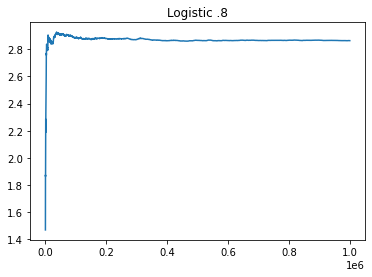

The l2 norm is: 8.34721363681406
SSE array:  [195.0, 181.0, 169.0, 176.0, 184.0, 162.0, 167.0, 167.0, 169.0, 183.0, 176.0, 166.0, 176.0, 179.0, 174.0, 178.0, 181.0, 171.0, 175.0, 172.0, 161.0, 170.0, 161.0, 194.0, 176.0, 159.0, 166.0, 172.0, 164.0, 171.0, 168.0, 167.0, 168.0, 181.0, 169.0, 168.0, 161.0, 165.0, 167.0, 161.0, 163.0, 163.0, 166.0, 176.0, 166.0, 171.0, 180.0, 162.0, 210.0, 212.0, 162.0, 172.0, 170.0, 167.0, 168.0, 174.0, 177.0, 163.0, 164.0, 168.0, 187.0, 174.0, 167.0, 168.0, 163.0, 162.0, 169.0, 173.0, 189.0, 169.0, 176.0, 181.0, 166.0, 181.0, 172.0, 168.0, 173.0, 170.0, 181.0, 166.0, 157.0, 184.0, 185.0, 172.0, 185.0, 184.0, 176.0, 171.0, 185.0, 182.0, 173.0, 174.0, 182.0, 183.0, 168.0, 175.0, 172.0, 173.0, 176.0, 179.0, 165.0, 173.0, 171.0, 178.0, 170.0, 163.0, 173.0, 164.0, 169.0, 171.0, 182.0, 182.0, 179.0, 182.0, 171.0, 171.0, 164.0, 170.0, 170.0, 174.0, 177.0, 160.0, 175.0, 185.0, 169.0, 169.0, 165.0, 164.0, 172.0, 164.0, 184.0, 168.0, 164.0, 176.0, 158.0, 163.0, 16

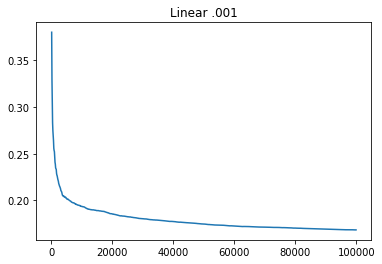

[ 0.19047684  0.79054865 -0.58573776  0.11902677  0.09320946  0.0121538
  0.23700198  0.47639864]
The l2 norm is: 1.1447558735228482
SSE array:  [182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 181.0, 181.0, 181.0, 181.0, 181.0, 180.0, 181.0, 181.0, 180.0, 180.0, 179.0, 180.0, 179.0, 179.0, 180.0, 178.0, 178.0, 179.0, 180.0, 179.0, 176.0, 177.0, 176.0, 175.0, 175.0, 175.0, 175.0, 169.0, 165.0, 165.0, 165.0, 165.0, 161.0, 165.0, 165.0, 160.0, 161.0, 154.0, 155.0, 161.0, 161.0, 161.0, 161.0, 161.0, 161.0, 160.0, 160.0, 168.0, 168.0, 163.0, 162.0, 163.0, 164.0, 161.0, 162.0, 161.0, 162.0, 160.0, 158.0, 161.0, 163.0, 164.0, 164.0, 159.0, 162.0, 165.0, 159.0, 158.0, 162.0, 164.0, 163.0, 163.0, 158.0, 159.0, 157.0, 157.0, 155.0, 162.0, 165.0, 161.0, 165.0, 165.0, 163.0, 159.0, 159.0, 159.0, 157.0, 156.0, 158.0, 155.0, 158.0, 156.0, 161.0, 166.0, 169.0, 165.0, 165.0, 165.0, 165.0, 158.0, 161.0, 166.0, 170.0, 166.0, 157.0, 

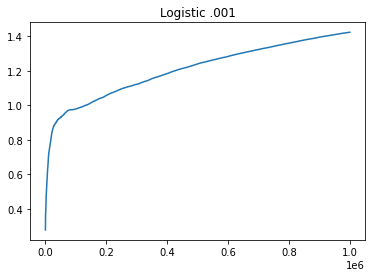

The l2 norm is: 6.650554242847173
SSE array:  [182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 1

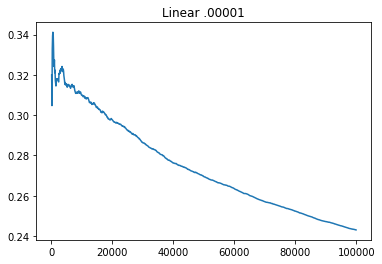

The l2 norm is: 0.23067832449544584
SSE array:  [182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0, 182.0,

KeyboardInterrupt: ignored

In [ ]:
#Outputs for C

w1lin, loss1lin, step1lin, l2, sse = SGD_Linear(x,y,weights,.8, xtest, ytest, threshold=1e-06)

plt.figure()
plt.plot(step1lin, loss1lin)
plt.title("Linear .8")
plt.show()
print("The l2 norm is:", l2)
print("SSE array: ",  sse)


w1log, loss1log, step1log, l2, sse = SGD_Logistic(x,y,weights,.8, xtest, ytest, threshold=1e-06)

plt.figure()
plt.plot(step1log, loss1log)
plt.title("Logistic .8")
plt.show()
print("The l2 norm is:", l2)
print("SSE array: ",  sse)


w1lin, loss2lin, step2lin, l2, sse = SGD_Linear(x,y,weights,.001, xtest, ytest, threshold=1e-06)

plt.figure()
plt.plot(step2lin, loss2lin)
plt.title("Linear .001")
plt.show()
print(w1lin)
print("The l2 norm is:", l2)
print("SSE array: ",  sse)

w1lin, loss2log, step2log, l2, sse = SGD_Logistic(x,y,weights,.001,xtest,ytest,threshold=1e-06)

plt.figure()
plt.plot(step2log, loss2log)
plt.title("Logistic .001")
plt.show()
print("The l2 norm is:", l2)
print("SSE array: ",  sse)


w1lin, loss3lin, step3lin, l2, sse = SGD_Linear(x,y,weights,.00001, xtest, ytest, threshold=1e-06)

plt.figure()
plt.plot(step3lin, loss3lin)
plt.title("Linear .00001")
plt.show()
print("The l2 norm is:", l2)
print("SSE array: ",  sse)

w1lin, loss3log, step3log, l2, sse = SGD_Logistic(x,y,weights,.00001, xtest, ytest, threshold=1e-06)

plt.figure()
plt.plot(step3log, loss3log)
plt.title("Logistic .00001")
plt.show()
print("The l2 norm is:", l2)
print("SSE array: ",  sse)


In [ ]:
#Question D(i):

ws,_,_,_,_ = SGD_Linear(x,y,weights,.001,xtest,ytest)

print(ws)






[ 0.19751477  0.77170545 -0.58677198  0.12541568  0.09588788 -0.01635012
  0.21321955  0.46553423]


Question D(ii):

I chose to do a Linear Regression with step size .001 because it seemed to be the best. I got the weights that are seen in the ouput above. For every unit increase in BMI, 2 hour insulin level, or Plasma Glucose Level, the odds of a patient having diabetes increases by a factor of the predictor variable's respective weights. 

Reflection:

1. This homework took me about 5 hours to complete
2. The learning activites I completed to partake were understanding class lectures and texbook material to grasp the concepts as well as using internet resources to familiarize myself.
3. The resources I used were numerous websites for SGD equations and walkthroughs so I could implement it in code as well as Python syntax databases. I can provide links I just need to find all of them.
4. Completing this homework enhanced my learning by giving me a real application of how the SGD algorithm in class works with an actual data set and how to implement it in code.